# K-means implementation


<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" width="600">


**Understanding K-means Clustering**

K-means clustering is a technique used to organize data into groups based on their similarity. The algorithm works by first randomly picking some central points called centroids and each data point is then assigned to the closest centroid forming a cluster. After all the points are assigned to a cluster the centroids are updated by finding the average position of the points in each cluster. This process repeats until the centroids stop changing forming clusters. The goal of clustering is to divide the data points into clusters so that similar data points belong to same group.

**How k-means clustering works?**

We are given a data set of items with certain features and values for these features (like a vector). The task is to categorize those items into groups. To achieve this, we will use the K-means algorithm. ‘K’ in the name of the algorithm represents the number of groups/clusters we want to classify our items into.

The algorithm will categorize the items into k groups or clusters of similarity. To calculate that similarity, we will use the Euclidean distance as a measurement. The algorithm works as follows:  

- First, we randomly initialize k points, called means or cluster centroids.
- We categorize each item to its closest mean, and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

**Implementation of K-Means Clustering in Python**

We will use blobs datasets and show how clusters are made.

`Step 1: Importing the necessary libraries`

We are importing Numpy for statistical computations, Matplotlib to plot the graph, and make_blobs from sklearn.datasets.

🔧 Sklearn Installation: [Getting Started with Sklearn](https://pypi.org/project/scikit-learn/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

`Step 2: Create the custom dataset with make_blobs and plot it`

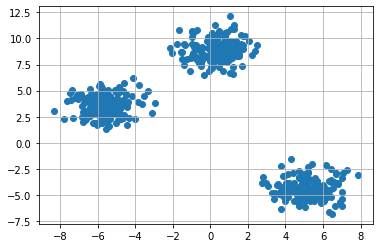

In [2]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

`Step 3: Initialize the random centroids`

The code initializes three clusters for K-means clustering. It sets a random seed and generates random cluster centers within a specified range, and creates an empty list of points for each cluster.

In [3]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

`Step 4: Plot the random initialize center with data points`

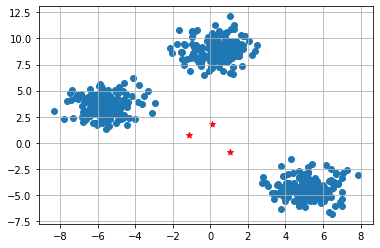

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

The plot displays a scatter plot of data points (X[:,0], X[:,1]) with grid lines. It also marks the initial cluster centers (red stars) generated for K-means clustering.

`Step 5: Define Euclidean distance`

In [5]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

`Step 6: Create the function to Assign and Update the cluster center`

This step assigns data points to the nearest cluster center, and the M-step updates cluster centers based on the mean of assigned points in K-means clustering.

In [6]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters

`Step 7: Create the function to Predict the cluster for the datapoints`

In [7]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

Reference: https://www.geeksforgeeks.org/k-means-clustering-introduction/